In [20]:
## K-Means clustering By Priti Sharma
## For this assignment performed k-mean algorithm on Yahoo Stock live data. 
## This stock analysis is focused on some of the companies listed.
## Here I am calculating daily stock movements, this analysis will help an investor to make a decision 
## on what stocks to purchase which have less daily movements.
## This will help new investor when investing in stock to get long term profit and low investment risk.

In [21]:
from pandas_datareader import data 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import plotly.graph_objects as go

In [22]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Synopsys':'SNPS',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'Cadence':'CDNS',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'ABB':'ABB',
    'Sony':'SONY',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

companies_dict.values()

dict_values(['AMZN', 'AAPL', 'WBA', 'NOC', 'BA', 'LMT', 'MCD', 'INTC', 'SNPS', 'IBM', 'TXN', 'MA', 'MSFT', 'GE', 'CDNS', 'AXP', 'PEP', 'KO', 'JNJ', 'TM', 'HMC', 'ABB', 'SONY', 'XOM', 'CVX', 'VLO', 'F', 'BAC'])

In [23]:
df = web.DataReader(list(companies_dict.values()),'yahoo',start='2019-01-01',end='2021-07-5')

In [24]:
df.head

<bound method NDFrame.head of Attributes    Adj Close                                                 \
Symbols            AMZN        AAPL        WBA         NOC          BA   
Date                                                                     
2019-01-02  1539.130005   38.326286  60.846291  234.309143  314.645142   
2019-01-03  1500.280029   34.508709  60.211353  228.174896  302.100525   
2019-01-04  1575.390015   35.981865  62.214516  235.764267  317.822540   
2019-01-07  1629.510010   35.901775  62.572231  237.599808  318.823425   
2019-01-08  1656.579956   36.586174  63.824215  238.674484  330.891937   
...                 ...         ...        ...         ...         ...   
2021-06-28  3443.889893  134.382248  51.206039  367.023682  239.960007   
2021-06-29  3448.139893  135.927673  50.990269  357.208923  235.759995   
2021-06-30  3440.159912  136.555817  51.598347  360.302032  239.559998   
2021-07-01  3432.969971  136.864899  47.773338  364.455963  239.729996   
2021-07-

In [25]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']
movements = stock_close - stock_open
sum_of_movement = np.sum(movements,1)
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AMZN, Change:-246.8436279296875
company:AAPL, Change:39.92235565185547
company:WBA, Change:-25.060016632080078
company:NOC, Change:10.0399169921875
company:BA, Change:-208.27051544189453
company:LMT, Change:-15.54931640625
company:MCD, Change:1.1003265380859375
company:INTC, Change:20.959915161132812
company:SNPS, Change:74.54019165039062
company:IBM, Change:17.103233337402344
company:TXN, Change:48.139976501464844
company:MA, Change:-50.08949279785156
company:MSFT, Change:80.49990844726562
company:GE, Change:-27.886146545410156
company:CDNS, Change:41.78997802734375
company:AXP, Change:28.710121154785156
company:PEP, Change:13.400093078613281
company:KO, Change:-13.990005493164062
company:JNJ, Change:-5.3099212646484375
company:TM, Change:-16.080078125
company:HMC, Change:-0.8000087738037109
company:ABB, Change:3.5400466918945312
company:SONY, Change:-6.470054626464844
company:XOM, Change:-29.5899658203125
company:CVX, Change:-36.090003967285156
company:VLO, Change:-34.4999923

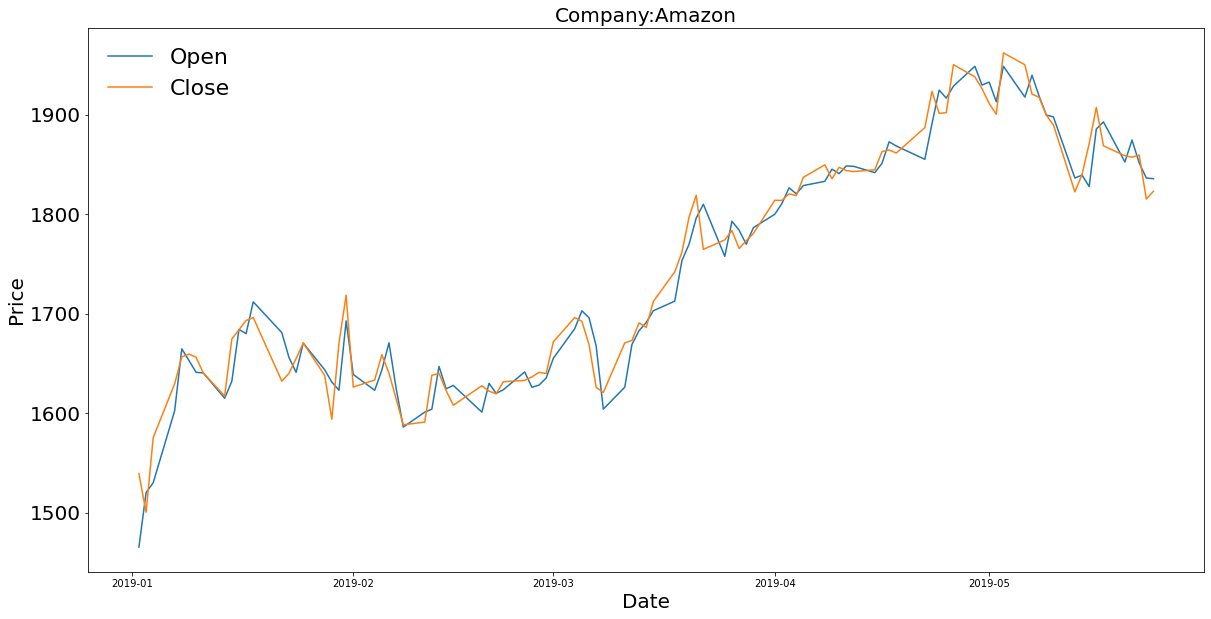

In [26]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:100]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:100]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

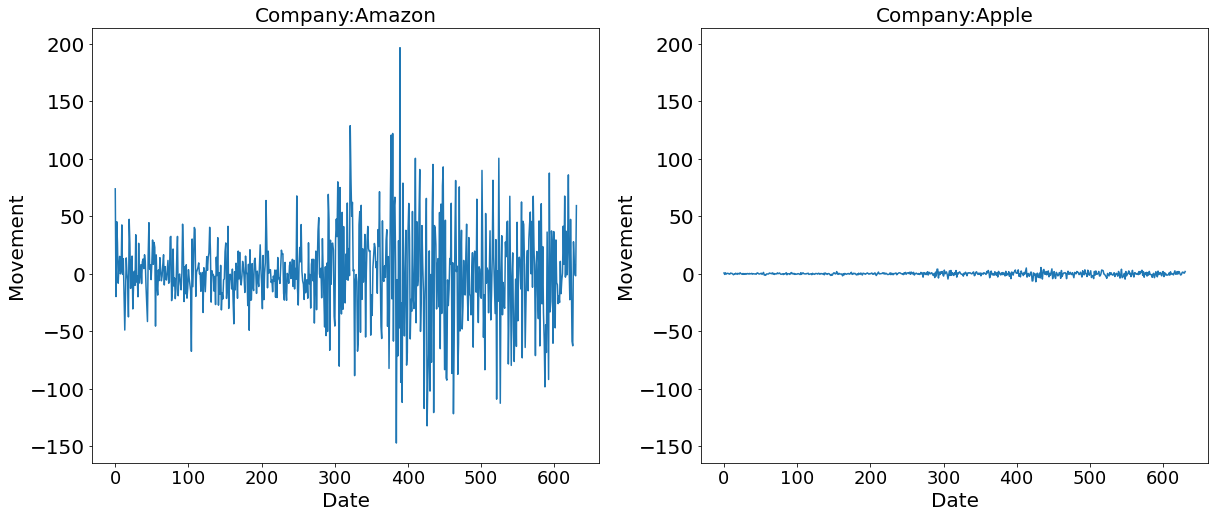

In [27]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [28]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.35392480739143367
0.2791001609021854
-6.502639462253545e-05


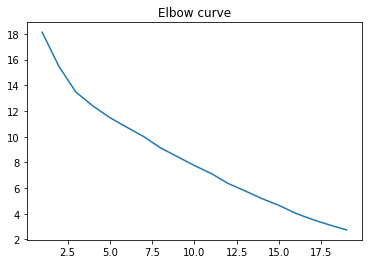

In [29]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()

sse = []

for k in range(1,20):
    kmeans = KMeans(n_clusters = k,max_iter = 100)
    pipeline = make_pipeline(normalizer,kmeans)
    pipeline.fit(movements)
    
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,20), sse)
plt.title("Elbow curve")
plt.show()


# Create Kmeans model
kmeans = KMeans(n_clusters = 8,max_iter = 100)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

In [30]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)

In [31]:
df1

,labels,companies
0,0,Amazon
1,0,Apple
22,0,Sony
14,0,Cadence
12,0,Microsoft
10,0,Texas Instruments
7,0,Intel
8,0,Synopsys
15,1,American Express
13,1,General Electrics
